In [ ]:
!pip install kaggle
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os
# Define the path to the downloaded ZIP file
zip_file_path = 'brain-tumor-mri-dataset.zip'

# Define the directory to extract files to
extract_dir = '/content/brain-tumor-mri-dataset'

# Create the directory if it does not exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to {extract_dir}")

Dataset extracted to /content/brain-tumor-mri-dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

# Define the CNN model
model = Sequential()

# Input layer (with shape specified)
model.add(Input(shape=(150, 150, 3)))

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Convolutional Block
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,008,193 (41.99 MB)

 Trainable params: 11,007,233 (41.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your data
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

# Data Augmentation and Normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)




Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Define the CNN model (Ensure this code runs before the training code)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(150, 150, 3)))

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Convolutional Block
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
    ]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,008,193 (41.99 MB)

 Trainable params: 11,007,233 (41.99 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.2342 - loss: -912.4945 - val_accuracy: 0.2273 - val_loss: 149.3721 - learning_rate: 1.0000e-04
Epoch 2/10
  1/178 ━━━━━━━━━━━━━━━━━━━━ 10:13 3s/step - accuracy: 0.2188 - loss: -6415.5332

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2188 - loss: -6415.5332 - val_accuracy: 0.2903 - val_loss: 121.7134 - learning_rate: 1.0000e-04
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 611s 3s/step - accuracy: 0.2531 - loss: -9783.6611 - val_accuracy: 0.1750 - val_loss: -2032.0691 - learning_rate: 1.0000e-04
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3438 - loss: -22975.2754 - val_accuracy: 0.1290 - val_loss: -2194.4385 - learning_rate: 1.0000e-04
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 579s 3s/step - accuracy: 0.2743 - loss: -29561.9199 - val_accuracy: 0.2289 - val_loss: -49844.6797 - learning_rate: 1.0000e-04
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2188 - loss: -74085.5781 - val_accuracy: 0.3871 - val_loss: -84959.8047 - learning_rate: 1.0000e-04
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.2746 - loss: -64277.8750 - val_accuracy: 0.2336 - val_loss: -115015.5781 - learning_rate: 1.0000e-04
Epoch 8/10
178/178

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 654ms/step - accuracy: 0.2135 - loss: -182501.0156
Test Accuracy: 22.65%


In [ ]:
import os

# Print the structure of the dataset directory
base_dir = '/content/brain-tumor-mri-dataset'
for dirpath, dirnames, filenames in os.walk(base_dir):
    print(f'Found directory: {dirpath}')
    for filename in filenames:
        print(f'File: {filename}')


Streaming output truncated to the last 5000 lines.
File: Tr-me_0708.jpg
File: Tr-me_0149.jpg
File: Tr-me_1084.jpg
File: Tr-me_0317.jpg
File: Tr-me_0085.jpg
File: Tr-me_0471.jpg
File: Tr-me_1023.jpg
File: Tr-me_0379.jpg
File: Tr-me_0707.jpg
File: Tr-me_0421.jpg
File: Tr-me_0345.jpg
File: Tr-me_1208.jpg
File: Tr-me_0147.jpg
File: Tr-me_1072.jpg
File: Tr-me_1095.jpg
File: Tr-me_0497.jpg
File: Tr-me_0384.jpg
File: Tr-me_0979.jpg
File: Tr-me_0982.jpg
File: Tr-me_0602.jpg
File: Tr-me_0796.jpg
File: Tr-me_0030.jpg
File: Tr-me_0187.jpg
File: Tr-me_0106.jpg
File: Tr-me_0962.jpg
File: Tr-me_0221.jpg
File: Tr-me_0064.jpg
File: Tr-me_0705.jpg
File: Tr-me_1224.jpg
File: Tr-me_0161.jpg
File: Tr-me_0318.jpg
File: Tr-me_0777.jpg
File: Tr-me_0331.jpg
File: Tr-me_1327.jpg
File: Tr-me_1321.jpg
File: Tr-me_0573.jpg
File: Tr-me_0284.jpg
File: Tr-me_0890.jpg
File: Tr-me_0202.jpg
File: Tr-me_0486.jpg
File: Tr-me_0078.jpg
File: Tr-me_0464.jpg
File: Tr-me_0434.jpg
File: Tr-me_0234.jpg
File: Tr-me_1265.jpg
File

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Verify the correct directory path
test_dir = '/content/brain-tumor-mri-dataset/Testing'
tumor_dir = os.path.join(test_dir, 'tumor')  # Adjust if necessary

# List files in the test directory
if os.path.exists(tumor_dir):
    test_files = os.listdir(tumor_dir)
    print(test_files)  # Print the list of files to find an image to use

    if test_files:
        # Choose the first image file for demonstration
        img_path = os.path.join(tumor_dir, test_files[0])

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Rescale the image

        # Make a prediction
        prediction = model.predict(img_array)
        prediction_class = 'Tumor' if prediction[0][0] > 0.5 else 'No Tumor'

        # Display the image
        plt.imshow(img)
        plt.title(f'Prediction: {prediction_class}')
        plt.axis('off')
        plt.show()
    else:
        print('No files found in the tumor directory.')
else:
    print('Tumor directory does not exist.')


Tumor directory does not exist.


In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 847ms/step - accuracy: 0.2339 - loss: -180227.3594
Test Loss: -180548.578125
Test Accuracy: 0.22654461860656738


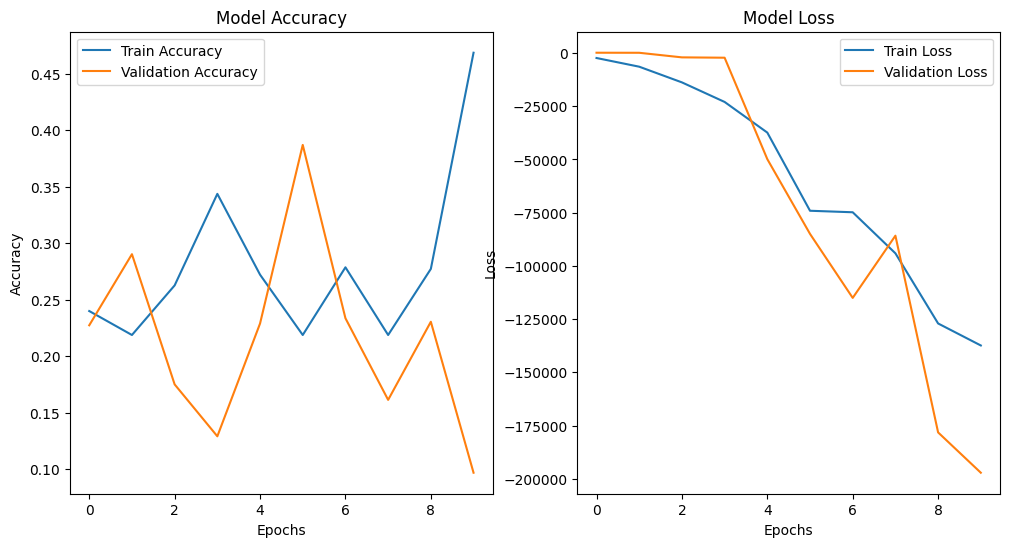

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()



In [ ]:
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError(f"Image not found or unable to load from the path: {image_path}")

# Convert color from BGR (OpenCV) to RGB (matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


ValueError: Image not found or unable to load from the path: /content/brain-tumor-mri-dataset/Testing/tumor/Tr-gl_0312.jpg

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Define the directory and choose an image file
image_directory = '/content/brain-tumor-mri-dataset/Testing/tumor'  # Change this path as needed
image_file = 'Tr-gl_0312.jpg'  # Replace this with an actual filename from the printed list
image_path = os.path.join(image_directory, image_file)

# Load image using OpenCV
image = cv2.imread(image_path)
# Convert color from BGR (OpenCV) to RGB (matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Enhance the image
# Convert image to grayscale for better contrast enhancement
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# Apply histogram equalization
image_equalized = exposure.equalize_hist(image_gray)
# Convert back to RGB
image_equalized_rgb = np.stack([image_equalized] * 3, axis=-1)

# Display the original and enhanced image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Enhanced image
ax[1].imshow(image_equalized_rgb)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
